<a href="https://www.kaggle.com/hamedetezadi/titanic-analysis-70-precision?scriptVersionId=88413716" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Titanic Competition

The points we should notice:

1)


* **Your feedback is welcome**



In [1]:
#importing some useful libraries
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Reading the data is the first step
submission = pd.read_csv('../input/titanic/gender_submission.csv')
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')
df_train.head(5)   # Watching the Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Useful Visualizations About The Features**

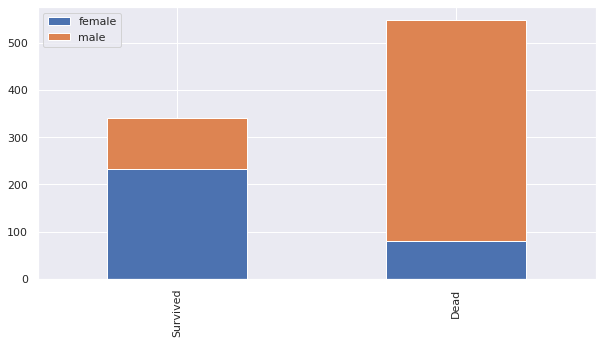

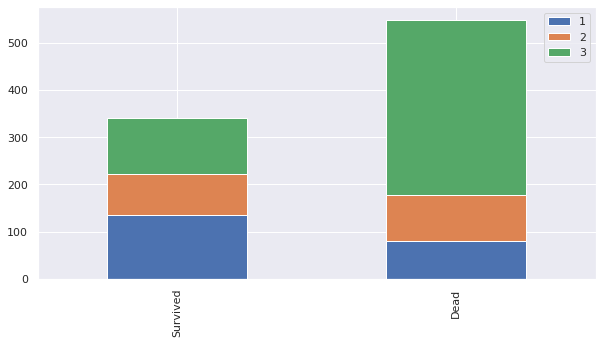

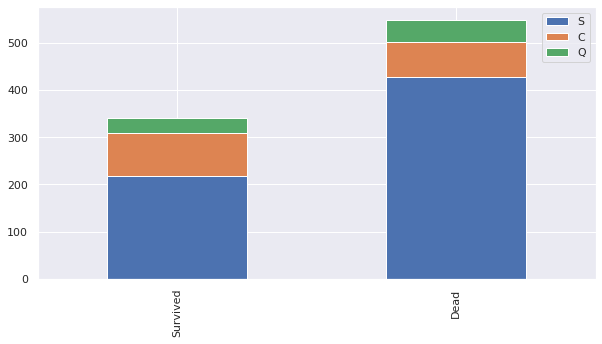

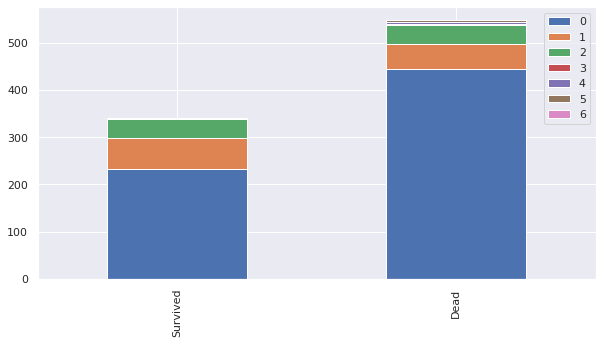

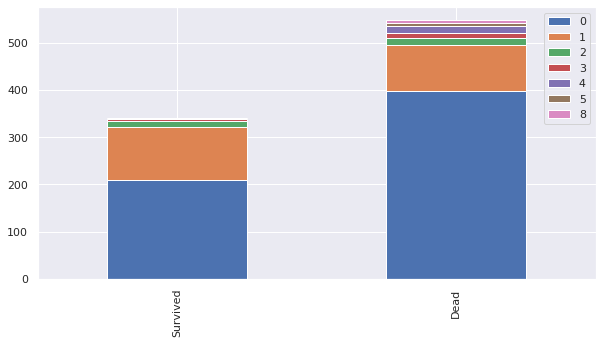

In [3]:
def bar_chart(feature):
    survived = df_train[df_train['Survived']==1][feature].value_counts()
    dead = df_train[df_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

bar_chart('Sex')
bar_chart('Pclass')
bar_chart('Embarked')
bar_chart('Parch')
bar_chart('SibSp')   

In [4]:
#Removing Nulls and Duplicates
print("Before Removing nulls")
print(pd.isnull(df_train).sum())
df_train.dropna(inplace=True)
print("After Removing nulls")
print(pd.isnull(df_train).sum())
#Removing Duplicates
size_before_Removing = len(df_train)
df_train = df_train.drop_duplicates()
size_after_Removing = len(df_train)
print(str(size_before_Removing - size_after_Removing) + " duplicates were removed.")
#Removing fare amount less than 7.5$
drop_i = df_train[df_train.Fare < 7.5].index
df_train = df_train.drop(drop_i)
print(df_train.describe())

Before Removing nulls
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
After Removing nulls
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
0 duplicates were removed.
       PassengerId    Survived      Pclass         Age       SibSp  \
count   180.000000  180.000000  180.000000  180.000000  180.000000   
mean    452.155556    0.683333    1.194444   35.646778    0.472222   
std     245.311518    0.466474    0.518886   15.767851    0.646698   
min       2.000000    0.000000    1.000000    0.920000    0.000000   
25%     261.750000    0.000000    1.000000   24.000000    0.000000   
50%     455.500000    1.000000    1.000000   36.0000

In [5]:
#Removing Nulls and Duplicates
print("Before Removing nulls")
print(pd.isnull(df_test).sum())
df_test.dropna(inplace=True)
print("After Removing nulls")
print(pd.isnull(df_test).sum())
#Removing Duplicates
size_before_Removing = len(df_test)
df_test = df_test.drop_duplicates()
size_after_Removing = len(df_test)
print(str(size_before_Removing - size_after_Removing) + " duplicates were removed.")
#Removing fare amount less than 7.5$
drop_i = df_test[df_test.Fare < 7.5].index
df_test = df_test.drop(drop_i)
print(df_test.describe())

Before Removing nulls
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
After Removing nulls
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
0 duplicates were removed.
       PassengerId     Pclass        Age      SibSp      Parch        Fare
count    85.000000  85.000000  85.000000  85.000000  85.000000   85.000000
mean   1099.517647   1.117647  39.300000   0.611765   0.494118  100.332600
std     126.426867   0.390719  15.283083   0.637968   0.867722   87.991194
min     904.000000   1.000000   1.000000   0.000000   0.000000    7.650000
25%     984.000000   1.000000  27.000000   0.000000   0.000000   39.000000
50%    1088.000000   1.000000  39.000000   1.000000   0.00

In [6]:
X = df_train.drop(['Cabin','Name','Ticket','Survived','PassengerId'], axis=1)
y=df_train.Survived

In [7]:
#Working on test data like the train data
df_Pred = df_test.drop(['Cabin','Name','Ticket','PassengerId'], axis=1)

In [8]:
#Categorizing sex feature
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
X['Sex-code'] = lb_make.fit_transform(X['Sex'])
X=X.drop(['Sex'], axis = 1)
print(X.head(5))

    Pclass   Age  SibSp  Parch     Fare Embarked  Sex-code
1        1  38.0      1      0  71.2833        C         0
3        1  35.0      1      0  53.1000        S         0
6        1  54.0      0      0  51.8625        S         1
10       3   4.0      1      1  16.7000        S         0
11       1  58.0      0      0  26.5500        S         0


In [9]:
lb_make = LabelEncoder()
df_Pred['Sex-code'] = lb_make.fit_transform(df_Pred['Sex'])
df_Pred=df_Pred.drop(['Sex'], axis = 1)
print(df_Pred.head(5))

    Pclass   Age  SibSp  Parch      Fare Embarked  Sex-code
12       1  23.0      1      0   82.2667        S         0
14       1  47.0      1      0   61.1750        S         0
24       1  48.0      1      3  262.3750        C         0
26       1  22.0      0      1   61.9792        C         0
28       1  41.0      0      0   30.5000        S         1


In [10]:
#get_dummies this function will help us to convert string columns to binary number
X=pd.get_dummies(X)
df_Pred = pd.get_dummies(df_Pred)

**Feature Engineering**

In [11]:
X['FamilySize'] = X ['SibSp'] + X['Parch'] + 1
df_Pred['FamilySize'] = df_Pred ['SibSp'] + df_Pred['Parch'] + 1

# Training model and predictions

In [12]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [13]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
clf.score(X,y)

0.8

In [14]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.85

In [15]:
max_depth_values= range(1,100)
scores_table=pd.DataFrame()
for max_depth in max_depth_values:
    clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score' : [train_score],
                                    'test_score':[test_score],
                                    'cross_val_score' : [mean_cross_val_score]
                                   })
    
    scores_table = scores_table.append(temp_score_data)
scores_table.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.750000,0.716667,0.750000
0,2,0.850000,0.700000,0.783333
0,3,0.850000,0.700000,0.783333
0,4,0.908333,0.733333,0.816667
0,5,0.941667,0.650000,0.775000


In [16]:
scores_table_long = pd.melt(scores_table, id_vars=['max_depth'], value_vars=['train_score', 'test_score','cross_val_score'],
                           var_name = 'set_type', value_name='score')
scores_table_long.head()

,max_depth,set_type,score
0,1,train_score,0.750000
1,2,train_score,0.850000
2,3,train_score,0.850000
3,4,train_score,0.908333
4,5,train_score,0.941667


,max_depth,set_type,score
198,1,cross_val_score,0.750000
199,2,cross_val_score,0.783333
200,3,cross_val_score,0.783333
201,4,cross_val_score,0.816667
202,5,cross_val_score,0.775000
203,6,cross_val_score,0.850000
204,7,cross_val_score,0.800000
205,8,cross_val_score,0.816667
206,9,cross_val_score,0.808333
207,10,cross_val_score,0.816667


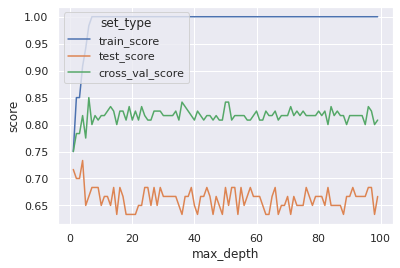

In [17]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_table_long)
scores_table_long.query("set_type == 'cross_val_score'").head(10)


In [18]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.6833333333333333

In [19]:
clf = tree.DecisionTreeClassifier()
parametrs = {'criterion' : ['gini','entropy'], 'max_depth': range(1, 30)}
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=10)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)


0.7

In [20]:
y_pred = best_clf.predict(X_test)
precision_score(y_test,y_pred)
recall_score(y_test, y_pred)


0.8285714285714286

<AxesSubplot:>

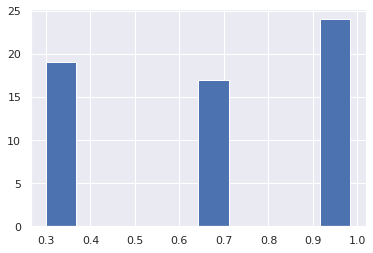

In [21]:
y_predicted_prob = best_clf.predict_proba(X_test)
pd.Series(y_predicted_prob[:, 1]).hist()

In [22]:
y_predicted_prob[:, 1]
y_pred = np.where(y_predicted_prob[:, 1 ] > 0.9, 1, 0)
precision_score(y_test , y_pred)

0.875

In [23]:
recall_score(y_test , y_pred)


0.6

In [24]:
pd.Series(y_predicted_prob[:, 1]).unique()


array([0.69230769, 0.98387097, 0.3       ])

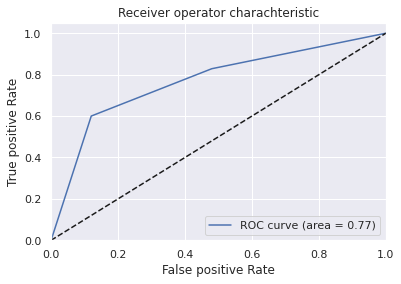

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

fpr, tpr ,thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr) #computing area under the curve

plt.figure()
lw = 5 #plot function for curving
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver operator charachteristic')
plt.legend(loc='lower right')

In [26]:
df_Pred.isnull().sum()

predictions = best_clf.predict(df_Pred)
#output = pd.DataFrame({ 'Survived': predictions})
#output.to_csv('Etezadi_submission.csv', index=False)

In [27]:
# train["Age"].fillna(train.groupby("Status")["Age"].transform("median"), inplace=True)
# test["Age"].fillna(test.groupby("Status")["Age"].transform("median"), inplace=True)
# train['Fare'].fillna(train.groupby(['Pclass', 'Parch', 'SibSp'])['Fare'].median()[3][0][0], inplace = True)
# test['Fare'].fillna(test.groupby(['Pclass', 'Parch', 'SibSp'])['Fare'].median()[3][0][0], inplace = True)
# train['Embarked'].fillna('S', inplace = True)
# test['Embarked'].fillna('S', inplace = True)

# More visualizations

In [28]:
# rf_model = RandomForestClassifier(max_depth=3, random_state=3)

In [29]:
# rf_model.fit(X_train, y_train)
# rf_test_predictions = rf_model.predict(X_test)

In [30]:
'''
xgb_param = {
    'n_estimators':list(range(100,500,50)),
    'max_depth' : [3, 4, 5],
    'learning_rate' : [0.1, 0.01, 0.05],
    'gamma' : [0, 0.25, 1],
    'reg_lambda' : [0, 1, 10],
}

'''

"\nxgb_param = {\n    'n_estimators':list(range(100,500,50)),\n    'max_depth' : [3, 4, 5],\n    'learning_rate' : [0.1, 0.01, 0.05],\n    'gamma' : [0, 0.25, 1],\n    'reg_lambda' : [0, 1, 10],\n}\n\n"

In [31]:
# xgb_model = XGBClassifier()

In [32]:
# xgbcv = GridSearchCV(xgb_model, param_grid = xgb_param, cv = 3, scoring = 'accuracy', n_jobs = 10, verbose = 10)

In [33]:
# xgbcv.fit(X_train, y_train)

In [34]:
#xgb_val_predictions = xgb_model.predict(X_valid)

In [35]:
#xgb_accuracy = accuracy_score(xgb_val_predictions,y_valid)

In [36]:
# rf_accuracy = accuracy_score(rf_test_predictions,y_test)
# rf_accuracy

In [37]:
#xgb_accuracy

In [38]:
# rf_accuracy

In [39]:
'''
rf_model.fit(X, y)
predictions = rf_model.predict(X_test)
predictions
'''

'\nrf_model.fit(X, y)\npredictions = rf_model.predict(X_test)\npredictions\n'

## **Preparing and formatting our submissions**

In [40]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('Etezadi_submission.csv', index=False)

# **Credits** :

* https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide
* https://www.kaggle.com/startupsci/titanic-data-science-solutions
* https://www.kaggle.com/rafalplis/my-approach-to-titanic-competition
* https://www.kaggle.com/brendan45774/titanic-top-solution